In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from IPython.display import display

%matplotlib inline

sns.set(font="simhei")

特情数据

In [27]:
train_s = pd.read_csv('input/train/special-case.csv')
display(train_s.head())
train_s.info()

,Airport,CTime,STime,ETime,Content
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,长沙机场航班延误黄色预警提示：预计明日（5月1日）12:00-16:00长沙黄花机场受雷雨天...
1,wuh,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8时-12时雷雨，期间进出港航班可能受到影响。
2,khn,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,预计，14时-17时小雷雨，期间进出港航班可能受到影响。
3,swa,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。
4,zha,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 5 columns):
Airport    15877 non-null object
CTime      15869 non-null object
STime      15869 non-null object
ETime      15862 non-null object
Content    15868 non-null object
dtypes: object(5)
memory usage: 620.4+ KB


时间转成int，机场名大写

In [28]:
train_s.dropna(axis=0, inplace=True)

train_s['CTime'] = pd.to_datetime(train_s['CTime']).astype(np.int64) // 10 ** 9
train_s['STime'] = pd.to_datetime(train_s['STime']).astype(np.int64) // 10 ** 9
train_s['ETime'] = pd.to_datetime(train_s['ETime']).astype(np.int64) // 10 ** 9

train_s.sort_values(['Airport', 'STime', 'ETime'], ascending=True, inplace=True)

train_s['Airport'] = train_s['Airport'].str.upper()

train_s.head()

,Airport,CTime,STime,ETime,Content
7063,ACX,1467573963,1467572400,1467576000,目前兴义机场有小雨雷，期间进出港航班可能会受到影响。
7080,ACX,1467620784,1467619200,1467626400,目前，兴义机场有雾，低云，期间进出港航班可能会受到影响。
6784,AHJ,1467008145,1467007200,1467014400,目前阿坝机场有雾，能见度600米，期间进出港航班可能会受到影响。
6621,AKU,1466544316,1466544000,1466550000,目前阿克苏机场有雷，期间进出港航班可能会受到影响。
6540,AQG,1466324409,1466323200,1466334000,目前安庆机场有雷雨，期间进出港航班可能会受到影响。


天气数据

In [26]:
train_w = pd.read_csv('input/train/weather.csv', low_memory=False)
display(train_w.head())
train_w.info()

,City,Weather,MinTp,MaxTp,Date
0,厦门,阴,21,26,2015-05-01
1,宁德,阵雨,19,25,2015-05-01
2,莆田,阵雨转阴,20,26,2015-05-01
3,泉州,阴,22,26,2015-05-01
4,漳州,阵雨转阴,22,28,2015-05-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828469 entries, 0 to 828468
Data columns (total 5 columns):
City       828469 non-null object
Weather    828399 non-null object
MinTp      778400 non-null object
MaxTp      678990 non-null object
Date       828469 non-null object
dtypes: object(5)
memory usage: 31.6+ MB


In [29]:
train_w['Weather'].value_counts()

多云            160028
小雨            158126
晴             111083
阴              40797
多云转晴           31667
晴转多云           30307
多云转小雨          25097
小雨转多云          23468
多云转阴           23164
阴转多云           14859
阴转小雨           14461
小雨转阴           13986
中雨             12126
中雨转小雨          10721
小雪              9727
阵雨              8602
雨夹雪             8041
小雨转中雨           7394
大雨              7336
雷阵雨             7020
阵雨转多云           5653
小雨转晴            4780
多云转阵雨           4197
多云转阴到多云间晴       3652
晴转小雨            3611
雷阵雨转多云          3133
晴间多云            3094
晴转阴             2749
阵雨转小雨           2360
小雨转雨夹雪          2241
               ...  
扬沙转雨夹雪             1
暴雪转阴               1
阵雨转扬沙              1
冻雨转多云              1
阴转雷阵雨伴有冰雹          1
大雪转雾               1
雷阵雨转扬沙             1
雷雨变得更频繁            1
有少量雪或小雪            1
间歇性降雨，雨势增强         1
一场或两场小雪            1
有几场大风雪             1
冻雨转晴               1
转小雪                1
时有雪、冰霰和雨           1
雪、冰霰夹雨             1
大到暴雨转小雨      

航班数据

In [4]:
train_1705 = pd.read_csv('input/train/fights-2017-05.csv')

display(train_1705.head())
train_1705.info()

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel
0,PVG,CKG,9C8867,1495602600,1495613700,1.495605e+09,1.495613e+09,2798.0,正常
1,CAN,TAO,HU7275,1493947200,1493958600,1.493948e+09,1.493958e+09,1479.0,正常
2,KWE,KMG,GJ8661,1494775200,1494779400,1.494783e+09,1.494787e+09,2957.0,正常
3,WNZ,CSX,CZ6956,1495185600,1495191300,1.495188e+09,1.495193e+09,419.0,正常
4,ENH,WUH,CZ3841,1494460800,1494465000,1.494471e+09,1.494474e+09,1421.0,正常


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326557 entries, 0 to 326556
Data columns (total 9 columns):
Departure         326557 non-null object
Destination       326557 non-null object
FLTNo             326557 non-null object
PDepartureTime    326557 non-null int64
PArrivalTime      326557 non-null int64
ADepartureTime    317996 non-null float64
AArrivalTime      317875 non-null float64
Id                322561 non-null float64
IsCancel          326557 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 22.4+ MB


In [5]:
train_1705.sort_values(['Departure', 'PDepartureTime'], ascending=True, inplace=True)

train_1705['Delay'] = (train_1705['ADepartureTime'] - train_1705['PDepartureTime']) / 60

train_1705['DelayRange'] = pd.cut(train_1705['Delay'], [-np.inf, 0, 10, 20, 30, 60, 120, 180, 300, 720, 1440, np.inf], 
                                  labels=['<0', '0-10', '10-20', '20-30', '30-60', '60-120', '120-180', '180-300', '300-720', '720-1440', '1440-inf'])
train_1705['DelayRange'].fillna("1440-inf", inplace=True) # nan值代表航班取消

train_1705.head()

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel,Delay,DelayRange
300856,AAT,URC,CZ6844,1494136200,1494139800,NaN,NaN,NaN,取消,NaN,1440-inf
169467,AAT,AKU,UQ2004,1496068500,1496074200,NaN,NaN,NaN,取消,NaN,1440-inf
118525,ACX,KWE,G52930,1493602500,1493605200,1.493602e+09,1.493604e+09,1112.0,正常,-11.0,<0
1428,ACX,SHA,MU5817,1493607900,1493618100,1.493609e+09,1.493617e+09,1336.0,正常,15.0,10-20
271661,ACX,KWE,G52610,1493609700,1493612100,1.493609e+09,1.493611e+09,834.0,正常,-5.0,<0


In [6]:
train_1705['DelayRange'].value_counts()

0-10        69045
10-20       64463
30-60       49311
<0          40533
20-30       36480
60-120      34479
120-180     13042
1440-inf     8561
180-300      8172
300-720      2414
720-1440       57
Name: DelayRange, dtype: int64

将特情信息合并进航班信息。每条航班增加如下字段：

- IsSpecial 标记该航班是否在特情范围内
- Msg 特情消息
- STime 特情开始时间
- ETime 特情结束时间

In [7]:
train_1705.loc[:, 'IsSpecial'] = False

maxPTime = train_1705['PDepartureTime'].max()
minPTime = train_1705['PDepartureTime'].min()
train_s2 = train_s[(train_s['STime'] >= minPTime) & (train_s['ETime'] <= maxPTime)]

last_ariport = ''
for i, row in train_s2.iterrows():
    if last_ariport != row['Airport']:
        last_ariport = row['Airport']
        idx = train_1705.loc[train_1705['Departure'] == row['Airport'], :].index
        
    is_in = ((train_1705.loc[idx, 'PDepartureTime'] >= row['STime']) & (train_1705.loc[idx, 'PDepartureTime'] <= row['ETime']))
    
    
    train_1705.loc[idx, 'IsSpecial'] = train_1705.loc[idx, 'IsSpecial'] | is_in
    
    train_1705.loc[is_in[is_in==True].index, 'Msg'] = row['Content']
    train_1705.loc[is_in[is_in==True].index, 'STime'] = row['STime']
    train_1705.loc[is_in[is_in==True].index, 'ETime'] = row['ETime']
    train_1705.loc[is_in[is_in==True].index, 'CurSpecial'] = (row['STime'] >= row['CTime'])


In [8]:
train_1705[train_1705['IsSpecial'] == True].head()

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel,Delay,DelayRange,IsSpecial,Msg,STime,ETime,CurSpecial
8289,CAN,WUX,MU2928,1493823600,1493833200,1.493825e+09,1.493832e+09,1142.0,正常,28.0,20-30,True,5月3日，广州管制区空域繁忙至17:50。【空中交通网】,1.493823e+09,1.493834e+09,False
239378,CAN,DYG,CZ3381,1493823600,1493829600,NaN,NaN,1033.0,取消,NaN,1440-inf,True,5月3日，广州管制区空域繁忙至17:50。【空中交通网】,1.493823e+09,1.493834e+09,False
270356,CAN,ZHA,CZ3329,1493823600,1493829000,1.493824e+09,1.493827e+09,937.0,正常,1.0,0-10,True,5月3日，广州管制区空域繁忙至17:50。【空中交通网】,1.493823e+09,1.493834e+09,False
77430,CAN,CKG,PN6206,1493823900,1493831400,NaN,NaN,491.0,取消,NaN,1440-inf,True,5月3日，广州管制区空域繁忙至17:50。【空中交通网】,1.493823e+09,1.493834e+09,False
163750,CAN,NKG,CZ3871,1493823900,1493832300,1.493826e+09,1.493840e+09,1662.0,正常,32.0,30-60,True,5月3日，广州管制区空域繁忙至17:50。【空中交通网】,1.493823e+09,1.493834e+09,False


延误时间分布

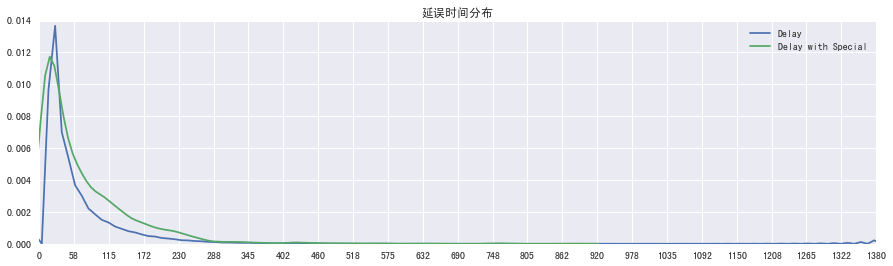

In [9]:
plt.figure(figsize=(15, 4))
g = sns.kdeplot(train_1705.loc[((~train_1705['Delay'].isnull()) & (train_1705['Delay'] > 0)), 'Delay'])
g2 = sns.kdeplot(train_1705.loc[((~train_1705['Delay'].isnull()) & (train_1705['Delay'] > 0) & (train_1705['IsSpecial'] == True)), 'Delay'], label='Delay with Special')
g.set_xlim(0, train_1705['Delay'].max())
g.set_title('延误时间分布')
g.xaxis.set_major_locator(ticker.LinearLocator(25))

可以看出，带特情的延误时间比全部延误时间还是要大的。


绘制每个延误时间段的情况。区分所有数据、带特情的数据。

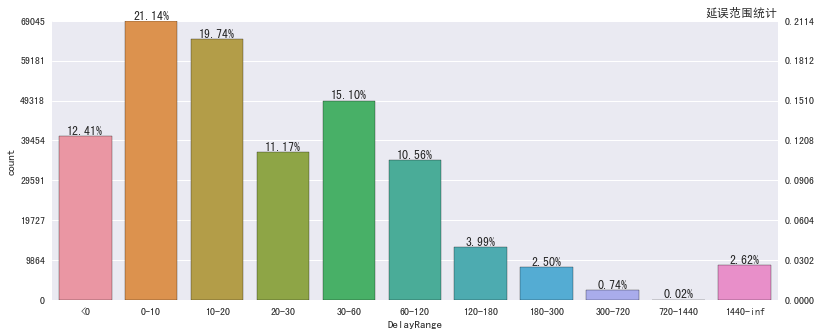

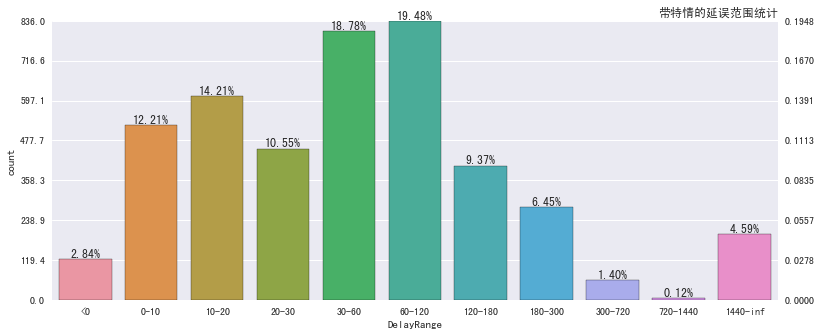

In [10]:
def plot_count_and_percentage(data, title='', t=8):
    plt.figure(figsize=(13, 5))
    g = sns.countplot(data)
    ncount = len(data)
    max_y = 0

    for p in g.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        max_y = max_y if max_y >= y else y
        g.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
    
    if title != '':
        g.set_title(title, loc='right')

    g.set_ylim(0, max_y)
    g.yaxis.set_major_locator(ticker.LinearLocator(t))
    
    g2 = g.twinx()
    g2.grid(None)
    g2.set_ylim(0, max_y/ncount)
    g2.yaxis.set_major_locator(ticker.LinearLocator(t))
    
plot_count_and_percentage(train_1705['DelayRange'], '延误范围统计')
plot_count_and_percentage(train_1705.loc[train_1705['IsSpecial'] == True, 'DelayRange'], '带特情的延误范围统计')

有上图可以看出，全部航班的延误在0-10分钟、10-20分钟的比例比较高。而带特情的航班的延误在30-60、60-120的比例比较到。而且带特请的航班延误3小时以上的概率明显增加。

绘制带特情数据的延误时间段的情况。区分特情的类型：“预计”、“目前”。

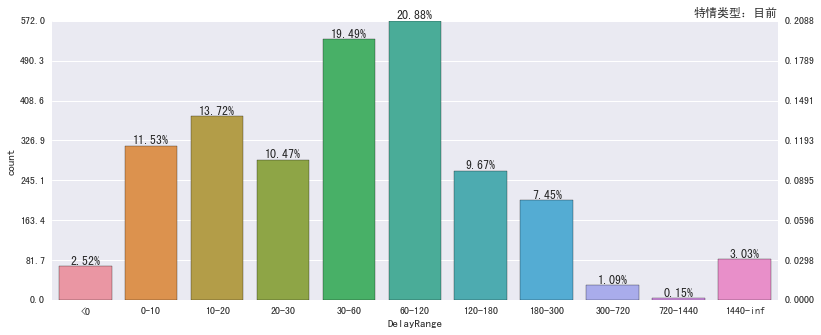

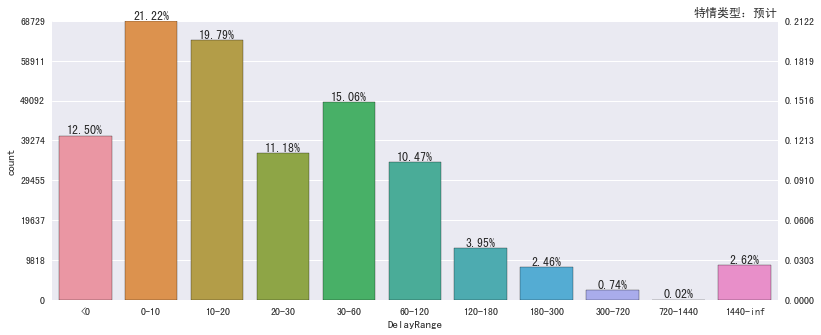

In [11]:
plot_count_and_percentage(train_1705.loc[train_1705['CurSpecial'] == True, 'DelayRange'], '特情类型：目前')
plot_count_and_percentage(train_1705.loc[train_1705['CurSpecial'] != True, 'DelayRange'], '特情类型：预计')

通过进一步分析带特情的航班，可以发现，特情类型为“目前”的航班比特情类型为“预计”的航班的延误时间明显要长。

看看延误超过3小时的航班的特情情况，可以发现绝大部分延误的航班并没有特情。

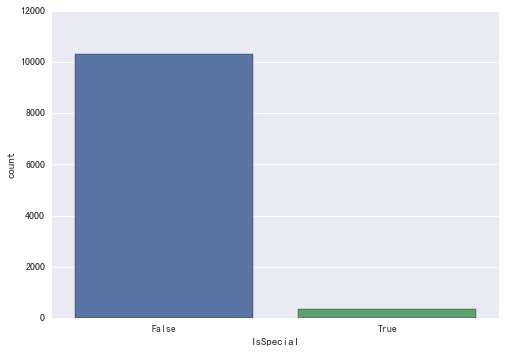

In [24]:
# train_1705[train_1705['Delay'] > 180]

g = sns.countplot('IsSpecial', data=train_1705[train_1705['Delay'] > 180])

航班与在它前面起飞航班的延误关系

In [30]:
idx = train_1705.index

j = 0
for i, row in train_1705.iterrows():
    k =idx.get_loc(i)
    m = 1
    n = 0
    nn = 0
    j += 1
    
    while k-m >= 0:
        diff = (row['PDepartureTime'] - train_1705.iloc[k-m]['PDepartureTime']) / 60
        if diff < 120:
            m += 1
            continue
        elif diff >= 120 and diff <= 180:
            nn += 1
            if train_1705.iloc[k-m]['Delay'] >= 180:
                n += 1
            m += 1
        else:
            m += 1
            break
    
    train_1705.loc[i, 'PreCount'] = nn
    train_1705.loc[i, 'PreDelay'] = n
        
    if j > 4000:
        break